In [46]:
import numpy as np
import pandas as pd
import os
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
# to make this notebook's output identical at every run
np.random.seed(42)
from wordcloud import WordCloud
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\libin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\libin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [2]:
df = pd.read_csv('Reviews.csv')
df.head()

,state,city,author,rating,date,description
0,AZ,Chandler,Della S.,4.0,1/12/2022,I stopped by during their grand opening. The s...
1,AZ,Chandler,Jen M.,3.0,3/2/2022,I have to bump Meet Fresh down. Although this ...
2,AZ,Chandler,Cameo L.,4.0,1/12/2022,Stopped by here for a snack and this place was...
3,AZ,Chandler,Kira N.,3.0,3/5/2022,Drop by if u'd like to take a peek inside and ...
4,AZ,Chandler,Joyce W.,4.0,12/28/2021,Meet Fresh was established in 2007 and has bee...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9253 entries, 0 to 9252
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        9253 non-null   object 
 1   city         9253 non-null   object 
 2   author       9253 non-null   object 
 3   rating       9253 non-null   float64
 4   date         9253 non-null   object 
 5   description  9253 non-null   object 
dtypes: float64(1), object(5)
memory usage: 433.9+ KB


In [4]:
df.drop_duplicates(subset=['date','description'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9102 entries, 0 to 9252
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        9102 non-null   object 
 1   city         9102 non-null   object 
 2   author       9102 non-null   object 
 3   rating       9102 non-null   float64
 4   date         9102 non-null   object 
 5   description  9102 non-null   object 
dtypes: float64(1), object(5)
memory usage: 497.8+ KB


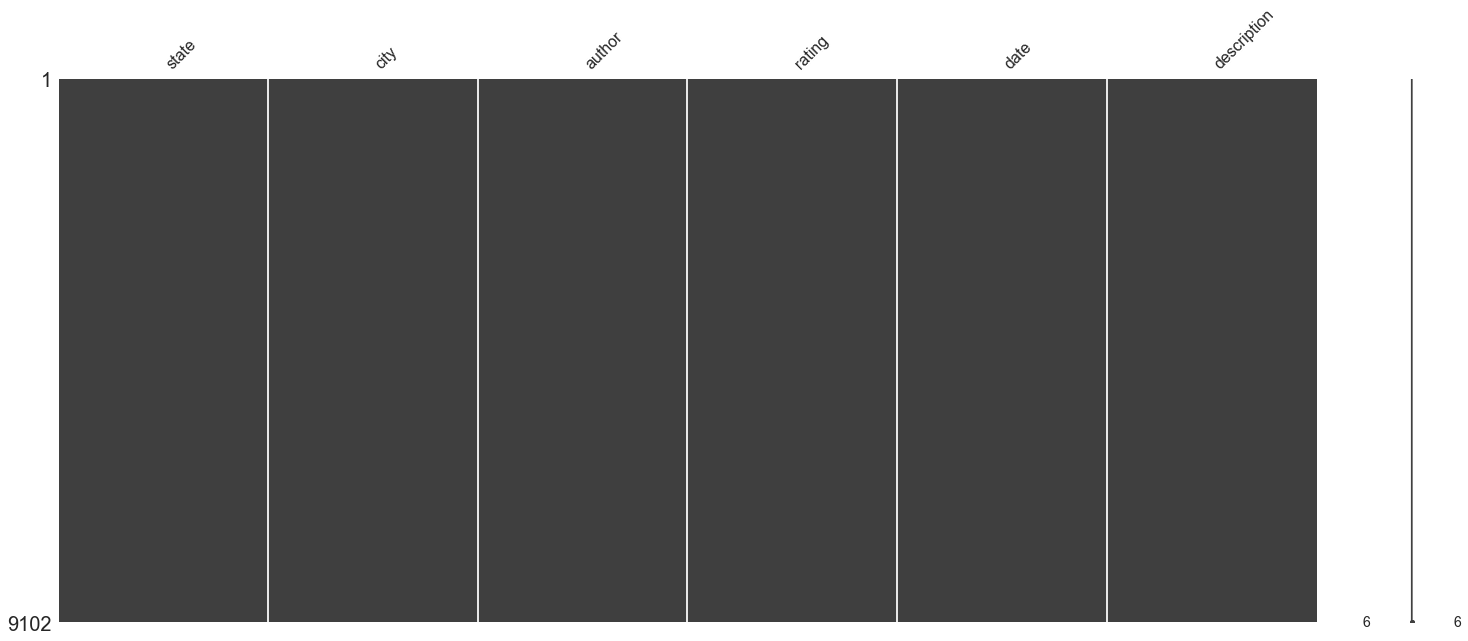

In [5]:
import missingno as msno
msno.matrix(df)
plt.show()

In [6]:
df.city.unique()

array(['Chandler', 'Arcadia', 'Artesia', 'Chino Hills', 'Cupertino',
       'Daly City', 'Fremont', 'Hacienda Heights', 'Irvine', 'Livermore',
       'Los Angeles', 'Orkland', 'San Diego', 'San Jose', 'San Mateo',
       'Santa Clara', 'Temple City', 'Westminster', 'Atlanta',
       'Champaign', 'Chicago', 'Boston', 'East Lansing',
       'Madison Heights', 'Chapel Hill', 'Edison', 'Jersey City',
       'Las Vegas', 'Brooklyn', 'Flushing', 'Long Island City',
       'New York', 'Houston', 'Katy', 'Plano', 'South Salt Lake',
       'Bellevue', 'Tukwila'], dtype=object)

In [7]:
df.state.unique()

array(['AZ', 'CA', 'GA', 'IL', 'MA', 'MI', 'NC', 'NJ', 'NV', 'NY', 'TX',
       'UT', 'WA'], dtype=object)

In [8]:
df['Review_of_day'] = pd.DatetimeIndex(df['date']).day
df['Review_of_month'] = pd.DatetimeIndex(df['date']).month
df['Review_of_year'] = pd.DatetimeIndex(df['date']).year

In [9]:
df.head()

,state,city,author,rating,date,description,Review_of_day,Review_of_month,Review_of_year
0,AZ,Chandler,Della S.,4.0,1/12/2022,I stopped by during their grand opening. The s...,12,1,2022
1,AZ,Chandler,Jen M.,3.0,3/2/2022,I have to bump Meet Fresh down. Although this ...,2,3,2022
2,AZ,Chandler,Cameo L.,4.0,1/12/2022,Stopped by here for a snack and this place was...,12,1,2022
3,AZ,Chandler,Kira N.,3.0,3/5/2022,Drop by if u'd like to take a peek inside and ...,5,3,2022
4,AZ,Chandler,Joyce W.,4.0,12/28/2021,Meet Fresh was established in 2007 and has bee...,28,12,2021


In [10]:
df.rating.mean()

3.343550867941112

In [11]:
df.to_excel("length.xlsx") 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9102 entries, 0 to 9252
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            9102 non-null   object 
 1   city             9102 non-null   object 
 2   author           9102 non-null   object 
 3   rating           9102 non-null   float64
 4   date             9102 non-null   object 
 5   description      9102 non-null   object 
 6   Review_of_day    9102 non-null   int64  
 7   Review_of_month  9102 non-null   int64  
 8   Review_of_year   9102 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 969.1+ KB


C:\Users\libin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Reviews Count by Rating ')

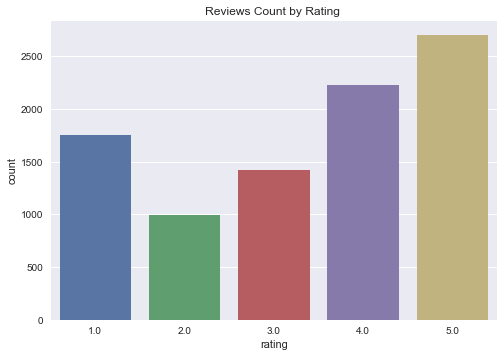

In [22]:
g = sns.countplot('rating', data=df)
g.set_title('Reviews Count by Rating ')

C:\Users\libin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Reviews Count by State ')

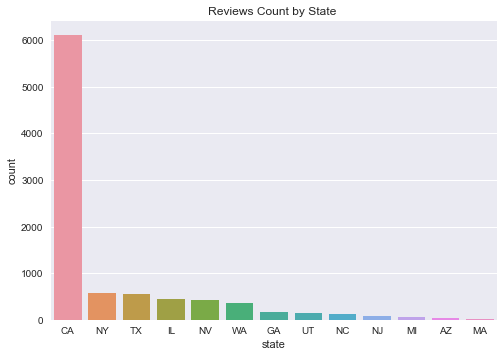

In [23]:
order = df.groupby(["state"])["description"].count().sort_values(ascending=False).index
h = sns.countplot('state', data=df, order= order)
h.set_title('Reviews Count by State ')

C:\Users\libin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Reviews Count by Year ')

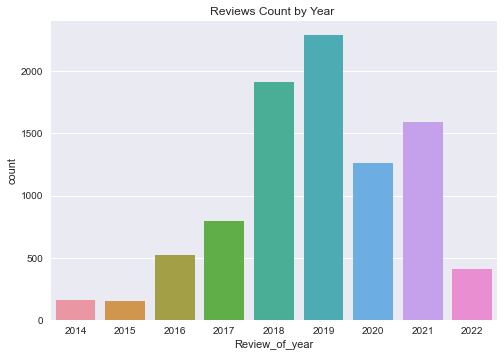

In [24]:
i = sns.countplot('Review_of_year', data=df)
i.set_title('Reviews Count by Year ')

C:\Users\libin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Reviews Count by Month ')

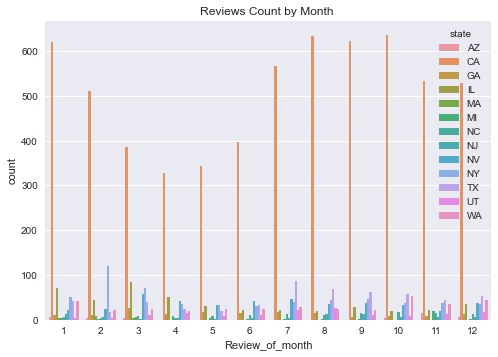

In [25]:
j = sns.countplot('Review_of_month', data=df,hue='state')
j.set_title('Reviews Count by Month ')

C:\Users\libin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Reviews Count by City ')

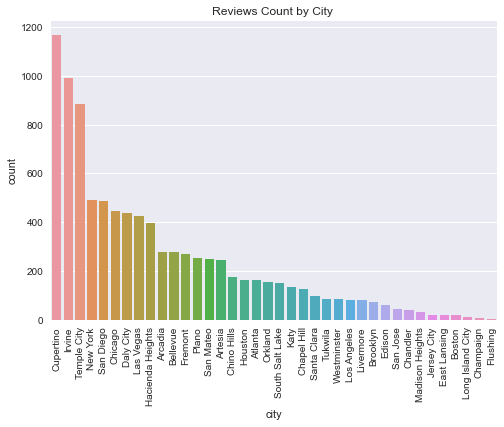

In [26]:
order = df.groupby(["city"])["description"].count().sort_values(ascending=False).index

k= sns.countplot('city', data=df, order=order)
plt.xticks(rotation=90)
k.set_title('Reviews Count by City ')

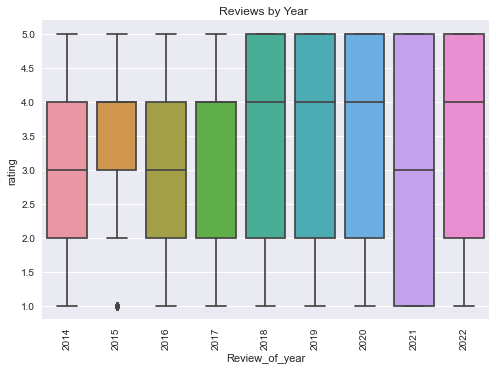

In [27]:
l=sns.boxplot(x='Review_of_year',y='rating', data=df)
plt.xticks(rotation=90)
l.set_title('Reviews by Year ')
plt.show()

Text(0.5, 0.98, 'Rating by City ')

<Figure size 12960x12960 with 0 Axes>

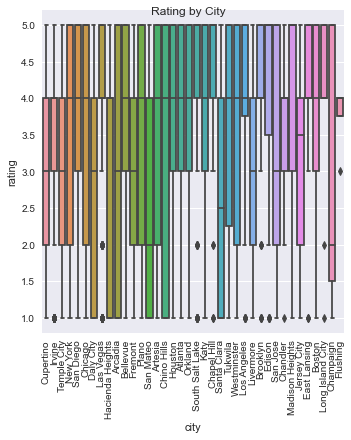

In [67]:
plt.figure(figsize=(180,180))
order = df.groupby(["city"])["rating"].count().sort_values(ascending=False).index

m = sns.catplot(x='city', y='rating', data=df, order=order, kind='box')
plt.xticks(rotation=90)
m.fig.suptitle('Rating by City ')


In [ ]:
df.head()

In [39]:
from nltk.corpus import stopwords
def text_clean(message):
    nopunc = [i for i in message if i not in string.punctuation]
    nn = "".join(nopunc)
    nn = nn.lower().split()
    nostop = [words for words in nn if words not in stopwords.words('english')]
    return(nostop)

In [40]:
review= df.description
review_bow = text_clean(review)
review_para = ' '.join(review_bow)

In [42]:
review_para

'stopped grand opening. service little bit slow hopefully gets better staff experience.<br><br>i tried icy grass jelly signature ($8.25) came grass jelly shaved ice, grass jelly, taro balls, half half. portion definitely shareable container came lot shaved ice. taro balls super chewy mild flavor.<br><br>i also tried winter melon tea lemon ($4.75) half sugar. even half sugar drink quite sweet. winter melon added toasty, nutty flavor made drink taste almost like lemon meringue pie!<br><br>the quality par locations i\'ve california.i bump meet fresh down. although franchise. marketing same. never specials like stores.<br><br> also, tables cleaned customers. everytime visit tables sticky hot store turn ac. last time went waffles said would take 20 min. unprepared large location. <br><br> shaved ice served bowl paper cup. fruit shaved ice received compared meet fresh location socal worlds apart. gave us sad cup ice. expect franchise. lot better!!!stopped snack place treat! vibe store front 

In [57]:
from wordcloud import WordCloud, STOPWORDS
my_stopwords = set(STOPWORDS)
my_stopwords.update(["br","nbsp"])

(-0.5, 399.5, 199.5, -0.5)

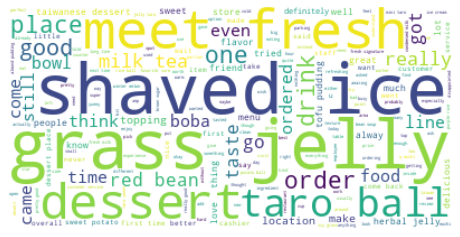

In [59]:
my_cloud = WordCloud(background_color = 'white', stopwords=my_stopwords).generate(review_para)
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')

In [47]:
from nltk import word_tokenize
word_tokens = [word_tokenize(review) for review in df.description]

In [49]:
len_tokens = []

for i in range(len(word_tokens)):
    len_tokens.append(len(word_tokens[i]))

In [50]:
df['n_tokens'] = len_tokens

In [51]:
df.head()

,state,city,author,rating,date,description,Review_of_day,Review_of_month,Review_of_year,n_tokens
0,AZ,Chandler,Della S.,4.0,1/12/2022,I stopped by during their grand opening. The s...,12,1,2022,164
1,AZ,Chandler,Jen M.,3.0,3/2/2022,I have to bump Meet Fresh down. Although this ...,2,3,2022,151
2,AZ,Chandler,Cameo L.,4.0,1/12/2022,Stopped by here for a snack and this place was...,12,1,2022,161
3,AZ,Chandler,Kira N.,3.0,3/5/2022,Drop by if u'd like to take a peek inside and ...,5,3,2022,132
4,AZ,Chandler,Joyce W.,4.0,12/28/2021,Meet Fresh was established in 2007 and has bee...,28,12,2021,154


In [62]:
df.n_tokens.describe()

count    9102.000000
mean      125.695232
std       109.367354
min         6.000000
25%        51.000000
50%        94.000000
75%       166.000000
max      1228.000000
Name: n_tokens, dtype: float64

C:\Users\libin\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\libin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\libin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\libin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot`

rating
1.0    115.017654
2.0    138.474320
3.0    150.574842
4.0    146.488779
5.0     97.689489
Name: n_tokens, dtype: float64

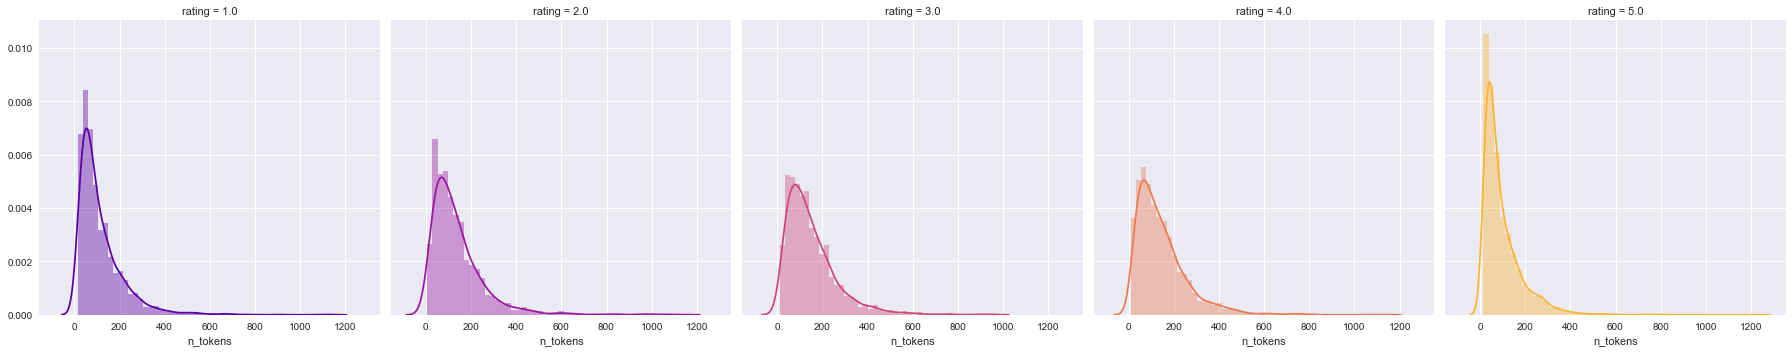

In [64]:
a = sns.FacetGrid(data = df, col = 'rating', hue = 'rating', palette='plasma', size=5)
a.map(sns.distplot, "n_tokens")
df.groupby('rating').mean()['n_tokens']

In [68]:
df.to_excel("length.xlsx") 